In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from scipy.stats.distributions import chi2
from sklearn.metrics import r2_score,mean_squared_error
import warnings
from pmdarima.arima import auto_arima
warnings.filterwarnings("ignore")
import seaborn as sns
sns.set()

In [5]:
raw_csv_data = pd.read_csv('1.05 STATION HIRONPOINT.csv')
raw_csv_data.head()
df_comp =raw_csv_data.copy()

In [6]:
df_comp.Date = pd.to_datetime(df_comp.Date, dayfirst = True)
df_comp.set_index("Date",inplace=True)

In [7]:
df_comp = df_comp.asfreq('d') #'d' -> daily

In [8]:
df_comp2 = df_comp.copy()
del df_comp['LOW']

In [9]:
size = int(len(df_comp)*0.8)
df = df_comp.iloc[:size]
df_test = df_comp.iloc[size:]
df2 = df_comp2.iloc[:size]
df2_test = df_comp2.iloc[size:]

In [10]:
df_test.tail()

,SURFACE PRESSURE,DEW POINT,TEMPERATURE,PRECIPITATION,MAX WIND SPD,RELATIVE HUMIDITY,MIN TEMP,N_ICE EXTENT,S_ICE EXTENT,HIGH
Date,,,,,,,,,,
2020-12-27,101.36,10.70,23.17,0.0,4.29,68.44,12.18,12.579,7.441,3.09
2020-12-28,101.31,10.18,23.54,0.0,3.74,61.88,12.98,12.582,7.208,2.76
2020-12-29,101.35,11.07,23.82,0.0,4.02,64.56,13.09,12.608,7.121,3.09
2020-12-30,101.45,12.75,24.06,0.0,4.53,72.25,13.26,12.622,6.984,3.01
2020-12-31,101.49,12.98,24.23,0.0,4.71,73.56,13.51,12.639,6.725,2.92


In [11]:
def LLR_test(mod_1, mod_2, DF = 1):
    L1 = mod_1.fit().llf
    L2 = mod_2.fit().llf
    LR = (2*(L2-L1))    
    p = chi2.sf(LR, DF).round(3)
    return p

In [12]:
start_date = "2020-03-14"
end_date = "2020-12-31"

In [13]:
df_comp.head()

,SURFACE PRESSURE,DEW POINT,TEMPERATURE,PRECIPITATION,MAX WIND SPD,RELATIVE HUMIDITY,MIN TEMP,N_ICE EXTENT,S_ICE EXTENT,HIGH
Date,,,,,,,,,,
2017-01-01,101.52,14.48,25.83,0.00,3.45,68.81,15.99,12.643,5.516,2.80
2017-01-02,101.50,12.86,28.01,0.00,4.31,62.06,15.41,13.861,2.498,2.71
2017-01-03,101.19,12.31,32.66,0.00,5.73,49.25,18.88,14.341,2.080,2.35
2017-01-04,100.83,23.60,31.47,0.31,7.51,78.69,25.56,14.164,3.653,2.68
2017-01-05,100.91,25.26,29.97,10.47,5.58,85.50,26.51,13.140,7.183,2.68


In [62]:
model_sarimax1 = SARIMAX(df.HIGH, exog = df[['SURFACE PRESSURE','TEMPERATURE',
                                               'MAX WIND SPD','N_ICE EXTENT']], order=(22,1,20), seasonal_order = (2,0,1,30))
results_sarimax1 = model_sarimax1.fit()
results_sarimax1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                       SARIMAX Results                                        
==============================================================================================
Dep. Variable:                                   HIGH   No. Observations:                 1168
Model:             SARIMAX(22, 1, 20)x(2, 0, [1], 30)   Log Likelihood                 287.320
Date:                                Sat, 26 Mar 2022   AIC                           -474.641
Time:                                        16:00:14   BIC                           -221.531
Sample:                                    01-01-2017   HQIC                          -379.165
                                         - 03-13-2020                                         
Covariance Type:                                  opg                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
SURFACE PRESSURE    -0.1649      0.025     -6.614      0.000      -0.214      -0.116
TEMPERATURE         -0.0108      0.003     -3.429      0.001      -0.017      -0.005
MAX WIND SPD        -0.0195      0.006     -3.426      0.001      -0.031      -0.008
N_ICE EXTENT        -0.0404      0.004     -9.940      0.000      -0.048      -0.032
ar.L1               -0.9135      0.519     -1.760      0.078      -1.931       0.104
ar.L2               -0.8686      0.710     -1.224      0.221      -2.260       0.523
ar.L3               -0.6400      0.698     -0.917      0.359      -2.007       0.727
ar.L4               -0.3759      0.501     -0.751      0.453      -1.357       0.606
ar.L5               -0.4380      0.343     -1.276      0.202      -1.111       0.235
ar.L6               -0.4587      0.433     -1.060      0.289      -1.307       0.389
ar.L7               -0.6359      0.528     -1.204      0.229      -1.671       0.399
ar.L8               -0.6941      0.513     -1.354      0.176      -1.699       0.311
ar.L9               -0.5713      0.478     -1.196      0.232      -1.508       0.365
ar.L10              -0.6521      0.481     -1.357      0.175      -1.594       0.290
ar.L11              -0.5074      0.511     -0.992      0.321      -1.509       0.495
ar.L12              -0.6846      0.456     -1.502      0.133      -1.578       0.209
ar.L13              -0.6533      0.466     -1.401      0.161      -1.568       0.261
ar.L14              -0.3286      0.488     -0.673      0.501      -1.286       0.628
ar.L15              -0.0401      0.425     -0.095      0.925      -0.872       0.792
ar.L16               0.3385      0.295      1.147      0.252      -0.240       0.917
ar.L17               0.2777      0.243      1.142      0.254      -0.199       0.754
ar.L18               0.0431      0.211      0.205      0.838      -0.370       0.456
ar.L19              -0.1743      0.198     -0.880      0.379      -0.562       0.214
ar.L20              -0.3559      0.195     -1.825      0.068      -0.738       0.026
ar.L21              -0.1790      0.139     -1.284      0.199      -0.452       0.094
ar.L22              -0.0468      0.095     -0.493      0.622      -0.233       0.139
ma.L1                0.5678      0.514      1.104      0.269      -0.440       1.575
ma.L2                0.3872      0.577      0.671      0.502      -0.744       1.518
ma.L3                0.0998      0.512      0.195      0.845      -0.903       1.103
ma.L4               -0.1622      0.279     -0.580      0.562      -0.710       0.386
ma.L5               -0.0636      0.175     -0.364      0.716      -0.406       0.279
ma.L6               -0.0352      0.169     -0.208      0.835      -0.367       0.296
ma.L7                0.0403      0.171      0.235      0.814      -0.296       0.376
ma.L8                0.0218      0.14

In [66]:
df_pred_sarimax1 = results_sarimax1.predict(start = start_date, end = end_date,
                                           exog = df_test[['SURFACE PRESSURE','TEMPERATURE',
                                               'MAX WIND SPD','N_ICE EXTENT']][start_date:end_date]) 

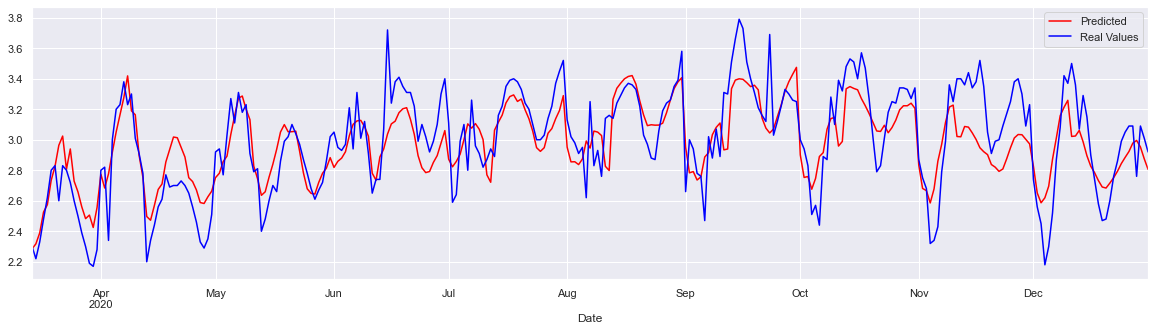

In [67]:
df_pred_sarimax1[start_date:end_date].plot(figsize = (20,5), color = "red")
df_test.HIGH[start_date:end_date].plot(color = "blue")
plt.legend(['Predicted', 'Real Values'])

In [68]:
acc =r2_score(df_test.HIGH[start_date:end_date],df_pred_sarimax1[start_date:end_date])
print("Testing Score: ",acc)

Testing Score:  0.6449050663054576


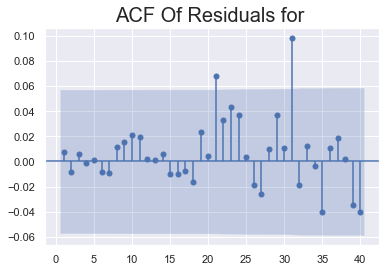

In [69]:
df['res'] = results_sarimax1.resid.iloc[:]
sgt.plot_acf(df.res[1:], zero = False, lags = 40)
plt.title("ACF Of Residuals for ",size=20)
plt.show()

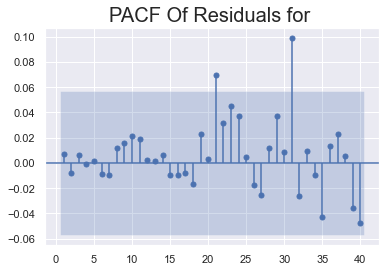

In [70]:
df['res'] = results_sarimax1.resid.iloc[:]
sgt.plot_pacf(df.res[1:], zero = False, lags = 40)
plt.title("PACF Of Residuals for ",size=20)
plt.show()